In [ ]:
import pandas as pd
import numpy as np
import random as rd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV, validation_curve, learning_curve
import time
import math
%matplotlib inline

In [3]:
train_data = pd.read_csv("CNS_gas_train.csv")
train_data

,Country,WELL_NAME,OGA Well Name,WH_SITETYPE,WH_FIELD,WH_BLOCK,WH_LAT,WH_LONG,WH_COORD_SYS,WH_OPERATOR,...,DD_G_H2,DN_G_N2,DD_G_GAS,DD_G_NC1,DD_G_NC2,DD_G_NC3,DD_G_IC4,DD_G_NC4,DD_G_IC5,DD_G_NC5
0,NaN,Well name,Well name,Site type,Field name,Block name,Latitude,Longitude,Location CRS,Operator,...,dDeuterium on H2,dN15 N2,dDeuterium total GAS,dDeuterium nC1,dDeuterium nC2,dDeuterium nC3,dDeuterium iC4,dDeuterium nC4,dDeuterium iC5,dDeuterium nC5
1,United Kingdom,023/22A-A12 (A12),23/22a-A12,WELL,PIERCE,023/22a,NaN,NaN,NaN,SHELL,...,NaN,-4,NaN,-187,NaN,NaN,NaN,NaN,NaN,NaN
2,United Kingdom,023/22A-A12 (A12),23/22a-A12,WELL,PIERCE,023/22a,NaN,NaN,NaN,SHELL,...,NaN,-3.7,NaN,-187,NaN,NaN,NaN,NaN,NaN,NaN
3,United Kingdom,023/22A-A12 (A12),23/22a-A12,WELL,PIERCE,023/22a,NaN,NaN,NaN,SHELL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,United Kingdom,023/22A-A12 (A12),23/22a-A12,WELL,PIERCE,023/22a,NaN,NaN,NaN,SHELL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,United Kingdom,023/22A-A12 (A12),23/22a-A12,WELL,PIERCE,023/22a,NaN,NaN,NaN,SHELL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,United Kingdom,023/22A-A12 (A12),23/22a-A12,WELL,PIERCE,023/22a,NaN,NaN,NaN,SHELL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,United Kingdom,023/22A-A12 (A12),23/22a-A12,WELL,PIERCE,023/22a,NaN,NaN,NaN,SHELL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,United Kingdom,023/22A-A12 (A12),23/22a-A12,WELL,PIERCE,023/22a,NaN,NaN,NaN,SHELL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,United Kingdom,023/22A-A12 (A12),23/22a-A12,WELL,PIERCE,023/22a,NaN,NaN,NaN,SHELL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
test_data = pd.read_csv("CNS_gas_test.csv")

In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 91 columns):
Country                    100 non-null object
WELL_NAME                  100 non-null object
OGA Well Name              100 non-null object
WH_SITETYPE                100 non-null object
WH_FIELD                   97 non-null object
WH_BLOCK                   100 non-null object
WH_LAT                     97 non-null float64
WH_LONG                    97 non-null float64
WH_COORD_SYS               97 non-null object
WH_OPERATOR                97 non-null object
WH_SPUD_DATE               97 non-null object
WH_SPUD_YEAR               97 non-null float64
WH_COMP_DATE               81 non-null object
WH_TD_M                    97 non-null float64
WH_DR_ELEV_M               97 non-null float64
WH_DEPTH_REF               97 non-null object
WH_WATER_DEPTH_M           32 non-null float64
SAMPLE_ID                  100 non-null object
SH_DEPTH_TOP_FT            100 non-null float64
SH_DEPTH

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1710 entries, 0 to 1709
Data columns (total 91 columns):
Country                    1709 non-null object
WELL_NAME                  1710 non-null object
OGA Well Name              1710 non-null object
WH_SITETYPE                1710 non-null object
WH_FIELD                   1657 non-null object
WH_BLOCK                   1679 non-null object
WH_LAT                     1681 non-null object
WH_LONG                    1681 non-null object
WH_COORD_SYS               1326 non-null object
WH_OPERATOR                1710 non-null object
WH_SPUD_DATE               1590 non-null object
WH_SPUD_YEAR               1296 non-null object
WH_COMP_DATE               817 non-null object
WH_TD_M                    1326 non-null object
WH_DR_ELEV_M               1326 non-null object
WH_DEPTH_REF               1326 non-null object
WH_WATER_DEPTH_M           214 non-null object
SAMPLE_ID                  1710 non-null object
SH_DEPTH_TOP_FT            1710

In [7]:
# Столбцы на дроп - где мало данных и повторы
cols_to_drop = ['OGA Well Name', 'WH_WATER_DEPTH_M', 'SH_ORIG_DESC', 'SH_TREATMENT_DESC', 'SH_LITH', 'SH_AGE', 'SH_AGE_BOT', 'SH_FORM_BOT', 'SAMPLE_ID_GM', 'SAMPLE_ID_SAM', 'EXT_SAMPLE_VENDOR',
                'SAMPLE_ID_SAM', 'EXT_SAMPLE_VENDOR', 'SAMPLE_ID_EXT', 'GAS_TOTAL_CONCENTRATION', 'GAS_AIR', 'C4_UNSAT', 'GAS_NEOC5', 'C5_UNSAT', 'GAS_NC5_PLUS', 'GAS_O2', 'GAS_HE', 'CSIA_NEOC5',
                'DC_G_CO2', 'DO_G_CO2', 'DS_G_H2S', 'DD_G_H2', 'DN_G_N2', 'DD_G_GAS', 'DD_G_NC1', 'DD_G_NC2', 'DD_G_NC3', 'DD_G_IC4', 'DD_G_NC4', 'DD_G_IC5', 'DD_G_NC5']

In [8]:
# Дропаем
train_data = train_data.drop(cols_to_drop, axis=1)
test_data = test_data.drop(cols_to_drop, axis=1)

In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 57 columns):
Country               100 non-null object
WELL_NAME             100 non-null object
WH_SITETYPE           100 non-null object
WH_FIELD              97 non-null object
WH_BLOCK              100 non-null object
WH_LAT                97 non-null float64
WH_LONG               97 non-null float64
WH_COORD_SYS          97 non-null object
WH_OPERATOR           97 non-null object
WH_SPUD_DATE          97 non-null object
WH_SPUD_YEAR          97 non-null float64
WH_COMP_DATE          81 non-null object
WH_TD_M               97 non-null float64
WH_DR_ELEV_M          97 non-null float64
WH_DEPTH_REF          97 non-null object
SAMPLE_ID             100 non-null object
SH_DEPTH_TOP_FT       100 non-null float64
SH_DEPTH_BOT_FT       100 non-null float64
SH_SAMPLE_TYPE        100 non-null object
SH_SAMPLE_SUB_TYPE    100 non-null object
SH_ORIG               81 non-null object
SH_TREATMENT       

In [10]:
# убираю описания из train_data
train_data = train_data.iloc[1:]

In [11]:
# берем все категориальные столбцы из теста
obj_df_test = test_data.select_dtypes(include=['object']).copy()
float_df_test = test_data.select_dtypes(include=['float64']).copy()
list_obj = list(obj_df_test.columns.values)
list_float = list(float_df_test.columns.values)

In [12]:
# получаем категориальные столбцы трейна
obj_df_train = train_data[list_obj]
obj_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1709 entries, 1 to 1709
Data columns (total 25 columns):
Country               1709 non-null object
WELL_NAME             1709 non-null object
WH_SITETYPE           1709 non-null object
WH_FIELD              1656 non-null object
WH_BLOCK              1678 non-null object
WH_COORD_SYS          1325 non-null object
WH_OPERATOR           1709 non-null object
WH_SPUD_DATE          1589 non-null object
WH_COMP_DATE          816 non-null object
WH_DEPTH_REF          1325 non-null object
SAMPLE_ID             1709 non-null object
SH_SAMPLE_TYPE        1709 non-null object
SH_SAMPLE_SUB_TYPE    1709 non-null object
SH_ORIG               1611 non-null object
SH_TREATMENT          1709 non-null object
SH_FORM               1386 non-null object
SH_CDATE              1411 non-null object
SH_COMMENT            1627 non-null object
GAS_METHOD            1709 non-null object
GAS_LAB               1709 non-null object
GAS_ACQ_DATE          1709 non-nul

In [13]:
# Преобразуем obj во float64 во всех колечественных в трейне
float_df_train = train_data[list_float]
float_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1709 entries, 1 to 1709
Data columns (total 32 columns):
WH_LAT             1680 non-null object
WH_LONG            1680 non-null object
WH_SPUD_YEAR       1295 non-null object
WH_TD_M            1325 non-null object
WH_DR_ELEV_M       1325 non-null object
SH_DEPTH_TOP_FT    1709 non-null object
SH_DEPTH_BOT_FT    1709 non-null object
SAMPLE_ID_GDB      555 non-null object
GAS_C1             1709 non-null object
GAS_C2             1709 non-null object
C2_UNSAT           1225 non-null object
GAS_C3             1709 non-null object
C3_UNSAT           1159 non-null object
GAS_IC4            1709 non-null object
GAS_NC4            1709 non-null object
GAS_IC5            1709 non-null object
GAS_NC5            1709 non-null object
GAS_C6PLUS         324 non-null object
GAS_CO2            842 non-null object
GAS_H2             156 non-null object
GAS_H2S            139 non-null object
GAS_N2             334 non-null object
CSIA_CONC_C1       

In [14]:
for i in list_float:
  float_df_train[i] = pd.to_numeric(float_df_train[i], errors='coerce')
float_df_train.info()

/Users/ergottli/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1709 entries, 1 to 1709
Data columns (total 32 columns):
WH_LAT             1680 non-null float64
WH_LONG            1679 non-null float64
WH_SPUD_YEAR       1295 non-null float64
WH_TD_M            1325 non-null float64
WH_DR_ELEV_M       1325 non-null float64
SH_DEPTH_TOP_FT    1709 non-null float64
SH_DEPTH_BOT_FT    1709 non-null float64
SAMPLE_ID_GDB      555 non-null float64
GAS_C1             1709 non-null float64
GAS_C2             1709 non-null float64
C2_UNSAT           1225 non-null float64
GAS_C3             1709 non-null float64
C3_UNSAT           1159 non-null float64
GAS_IC4            1709 non-null float64
GAS_NC4            1709 non-null float64
GAS_IC5            1709 non-null float64
GAS_NC5            1709 non-null float64
GAS_C6PLUS         324 non-null float64
GAS_CO2            842 non-null float64
GAS_H2             156 non-null float64
GAS_H2S            139 non-null float64
GAS_N2             334 non-null float

In [15]:
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder

In [16]:
le = preprocessing.LabelEncoder()
obj_to_float_df_train = obj_df_train.astype(str).apply(le.fit_transform)

In [17]:
obj_to_float_df_test = obj_df_test.astype(str).apply(le.fit_transform)

In [18]:
# Объединяю категориальные и количественные
train_df_final = pd.concat([float_df_train,obj_to_float_df_train], axis=1, join_axes=[float_df_train.index])

In [19]:
test_df_final = pd.concat([float_df_test,obj_to_float_df_test], axis=1, join_axes=[float_df_test.index])

In [20]:
train_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1709 entries, 1 to 1709
Data columns (total 57 columns):
WH_LAT                1680 non-null float64
WH_LONG               1679 non-null float64
WH_SPUD_YEAR          1295 non-null float64
WH_TD_M               1325 non-null float64
WH_DR_ELEV_M          1325 non-null float64
SH_DEPTH_TOP_FT       1709 non-null float64
SH_DEPTH_BOT_FT       1709 non-null float64
SAMPLE_ID_GDB         555 non-null float64
GAS_C1                1709 non-null float64
GAS_C2                1709 non-null float64
C2_UNSAT              1225 non-null float64
GAS_C3                1709 non-null float64
C3_UNSAT              1159 non-null float64
GAS_IC4               1709 non-null float64
GAS_NC4               1709 non-null float64
GAS_IC5               1709 non-null float64
GAS_NC5               1709 non-null float64
GAS_C6PLUS            324 non-null float64
GAS_CO2               842 non-null float64
GAS_H2                156 non-null float64
GAS_H2S          

In [21]:
# Заполняем наны нулями (ПОПРАВИТЬ ПОТОМ)
train_df_final = train_df_final.fillna(0)
test_df_final = test_df_final.fillna(0)

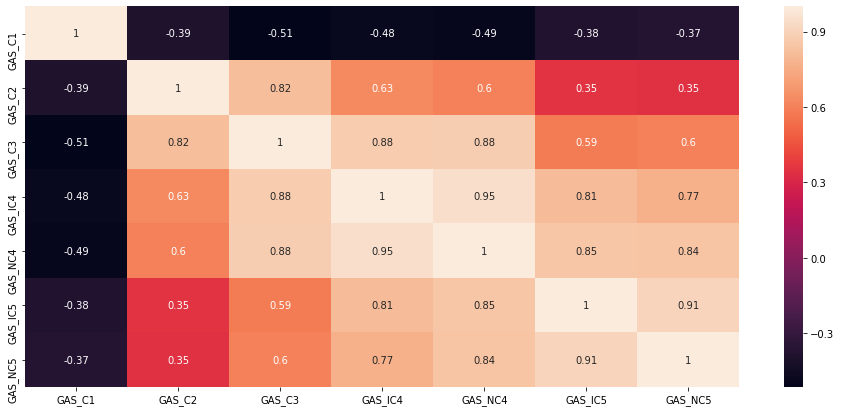

In [22]:
# Промежуточная матрица корреляций для искомых значений
corr = train_df_final[["GAS_C1", "GAS_C2", "GAS_C3", "GAS_IC4", "GAS_NC4", "GAS_IC5", "GAS_NC5"]].corr()
plt.figure(figsize=(16,7))
sns.heatmap(corr,annot=True)
plt.show()

In [23]:
# Оценим количество выбросов, выходящих за два стандартных отклонения для каждой из кривой
for column in ["GAS_C1", "GAS_C2", "GAS_C3", "GAS_IC4", "GAS_NC4", "GAS_IC5", "GAS_NC5"]:
    mean = train_df_final[column].mean()
    std = train_df_final[column].std()
    print('Number of outlies for well log %s is %d'%(column,
                                                     (train_df_final.loc[train_df_final[column] >=
                                                                     mean + 2*std,column].shape[0] + 
                                                      train_df_final.loc[train_df_final[column] <=
                                                                     mean - 2*std,column].shape[0])))

Number of outlies for well log GAS_C1 is 72
Number of outlies for well log GAS_C2 is 67
Number of outlies for well log GAS_C3 is 82
Number of outlies for well log GAS_IC4 is 65
Number of outlies for well log GAS_NC4 is 54
Number of outlies for well log GAS_IC5 is 36
Number of outlies for well log GAS_NC5 is 36


In [24]:
# Также посмотрим 5 и 95 перцентили, для оценки выбросов
print(train_df_final.quantile(0.05))
print(train_df_final.quantile(0.95))
train_df_final.describe()

WH_LAT                56.94918
WH_LONG                0.82119
WH_SPUD_YEAR           0.00000
WH_TD_M                0.00000
WH_DR_ELEV_M           0.00000
SH_DEPTH_TOP_FT        0.00000
SH_DEPTH_BOT_FT        0.00000
SAMPLE_ID_GDB          0.00000
GAS_C1                58.45800
GAS_C2                 0.55600
C2_UNSAT               0.00000
GAS_C3                 0.16000
C3_UNSAT               0.00000
GAS_IC4                0.01440
GAS_NC4                0.02600
GAS_IC5                0.00800
GAS_NC5                0.00732
GAS_C6PLUS             0.00000
GAS_CO2                0.00000
GAS_H2                 0.00000
GAS_H2S                0.00000
GAS_N2                 0.00000
CSIA_CONC_C1           0.00000
CSIA_NC1             -66.40000
CSIA_NC2             -38.50000
CSIA_NC3             -34.80000
CSIA_IC4             -34.00000
CSIA_NC4             -33.06000
CSIA_IC5             -31.00000
CSIA_NC5             -32.00000
CSIA_ETHENE          -32.00000
CSIA_PROPENE         -32.00000
Country 

,WH_LAT,WH_LONG,WH_SPUD_YEAR,WH_TD_M,WH_DR_ELEV_M,SH_DEPTH_TOP_FT,SH_DEPTH_BOT_FT,SAMPLE_ID_GDB,GAS_C1,GAS_C2,...,SH_FORM,SH_CDATE,SH_COMMENT,GAS_METHOD,GAS_LAB,GAS_ACQ_DATE,D_G_METHOD,D_G_LAB,D_G_DATA_TYPE,D_G_ACQ_DATE
count,1709.000000,1709.000000,1709.000000,1709.000000,1709.00000,1709.000000,1709.000000,1.709000e+03,1709.000000,1709.000000,...,1709.000000,1709.000000,1709.000000,1709.000000,1709.000000,1709.000000,1709.000000,1709.000000,1709.000000,1709.000000
mean,56.174414,1.666016,1514.896431,3537.152094,31.40228,12348.253786,12365.390702,8.295673e+04,84.746585,7.051586,...,53.500293,282.424225,638.826799,0.119953,1.562317,59.069046,0.263312,0.087185,0.870099,70.462844
std,7.386750,0.522873,856.810355,2102.783541,20.08966,5342.191651,5343.570503,1.675462e+05,14.955698,4.266277,...,27.494403,167.552528,386.969747,0.652149,1.143819,29.515485,0.646332,0.362151,0.336292,34.888404
min,0.000000,-1.460759,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000e+00,0.420000,0.002200,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,57.031577,1.423367,1982.000000,2535.936100,21.33600,9230.000000,9246.000000,0.000000e+00,82.000000,4.300000,...,28.000000,130.000000,332.000000,0.000000,1.000000,43.000000,0.000000,0.000000,1.000000,40.000000
50%,57.032196,1.953783,1997.000000,4578.705700,27.43200,13745.000000,13757.900000,0.000000e+00,89.100000,6.500000,...,59.000000,295.000000,579.000000,0.000000,1.000000,53.000000,0.000000,0.000000,1.000000,76.000000
75%,57.166968,1.953858,1999.000000,5340.095800,53.17850,16505.000000,16520.010000,1.981270e+05,93.000000,9.400000,...,83.000000,444.000000,1000.000000,0.000000,1.000000,82.000000,0.000000,0.000000,1.000000,108.000000
max,58.419832,2.778018,2013.000000,5650.077600,56.14420,22657.000000,22657.000000,1.000138e+06,100.000000,28.100000,...,85.000000,499.000000,1287.000000,4.000000,4.000000,114.000000,3.000000,2.000000,1.000000,113.000000


In [25]:
test_df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 57 columns):
WH_LAT                100 non-null float64
WH_LONG               100 non-null float64
WH_SPUD_YEAR          100 non-null float64
WH_TD_M               100 non-null float64
WH_DR_ELEV_M          100 non-null float64
SH_DEPTH_TOP_FT       100 non-null float64
SH_DEPTH_BOT_FT       100 non-null float64
SAMPLE_ID_GDB         100 non-null float64
GAS_C1                100 non-null float64
GAS_C2                100 non-null float64
C2_UNSAT              100 non-null float64
GAS_C3                100 non-null float64
C3_UNSAT              100 non-null float64
GAS_IC4               100 non-null float64
GAS_NC4               100 non-null float64
GAS_IC5               100 non-null float64
GAS_NC5               100 non-null float64
GAS_C6PLUS            100 non-null float64
GAS_CO2               100 non-null float64
GAS_H2                100 non-null float64
GAS_H2S               100 non-null f

In [26]:
# Предсказываем GAS_C1
target = ["GAS_C1", "GAS_C2", "GAS_C3", "GAS_IC4", "GAS_NC4", "GAS_IC5", "GAS_NC5"]

X = train_df_final.drop(target, axis=1).values
Y = train_df_final["GAS_C1"].values

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 2) # срез 20%

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(1367, 50) (1367,)
(342, 50) (342,)


In [31]:
import xgboost
from xgboost import plot_importance
from sklearn.model_selection import cross_val_score, KFold
from scipy.stats import skew
from collections import OrderedDict

In [ ]:
best_xgb_model = xgboost.XGBRegressor(colsample_bytree=0.5,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42)

best_xgb_model.fit(X_train,y_train)

Fitting 3 folds for each of 2592 candidates, totalling 7776 fits


/Users/ergottli/Library/Python/3.7/lib/python/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:   43.2s
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:   46.4s
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed:  2.8min
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:  3.6min
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:  5.0min
[Parallel(n_jobs=6)]: Done  49 tasks      | elapsed:  6.4min
[Parallel(n_jobs=6)]: Done  60 tasks      | elapsed:  7.1min
[Parallel(n_jobs=6)]: Done  73 tasks      | elapsed:  9.3min
[Parallel(n_jobs=6)]: Done  86 tasks      | elapsed: 10.7min
[Parallel(n_jobs=6)]: Done 101 tasks      | e

In [ ]:
# Another models
from sklaearn import neighbors.KNeighborsClassifier

In [33]:
best_xgb_model.predict(X_test)

array([ 84.909904 ,  82.783775 ,  96.7423   , 100.85519  ,  76.79005  ,
        69.35681  ,  92.09797  ,  88.88142  ,  58.530224 ,  93.90881  ,
        86.38761  ,  81.15822  ,  93.78193  ,  86.495094 ,  86.758606 ,
        68.49312  ,  94.575615 ,  85.041405 ,  70.43782  ,  78.31281  ,
        94.895874 ,  84.42835  ,  90.40779  ,  91.42838  ,  93.15988  ,
        83.189575 ,  92.120316 ,  92.40203  ,  85.40516  ,   9.28036  ,
        85.28062  ,  85.02624  ,  94.08696  ,  93.42393  ,  75.19633  ,
        84.452934 ,  93.39592  ,  92.481674 ,  95.835396 ,  90.036766 ,
        95.977715 ,  68.604866 ,  59.643017 ,  73.79475  ,  90.21786  ,
        90.72155  , 100.569115 ,  95.37659  ,  91.08172  ,  85.54569  ,
        88.16507  , 100.63999  ,  91.58587  ,  90.16255  ,  89.348045 ,
        91.75615  ,  83.9789   ,  91.16771  ,  95.84784  ,  58.459007 ,
        71.87516  ,  91.423386 ,  83.75605  ,  97.13865  ,  65.67592  ,
        95.026085 ,  92.32619  ,  71.47009  ,  87.842476 ,  94.4

In [34]:
best_xgb_model.score(X_test,y_test)

0.8762116300506522

In [35]:
best_xgb_model.score(X_train,y_train)

0.9999294016708685

In [36]:
# кросс валидация попроще
gbm = xgboost.XGBRegressor()
reg_cv = GridSearchCV(gbm, {"colsample_bytree":[1.0],"min_child_weight":[1.0,1.2]
                            ,'max_depth': [3,4,6], 'n_estimators': [500,1000]}, verbose=1)
reg_cv.fit(X_train,y_train)

/Users/ergottli/Library/Python/3.7/lib/python/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 12 candidates, totalling 36 fits
[14:33:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:33:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:33:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:33:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:33:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:33:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:33:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:33:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[14:34:00] 

[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  1.5min finished


[14:35:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'colsample_bytree': [1.0], 'max_depth': [3, 4, 6],
                         'min_child_weigh

In [37]:
reg_cv.best_params_

{'colsample_bytree': 1.0,
 'max_depth': 3,
 'min_child_weight': 1.2,
 'n_estimators': 1000}

In [38]:
gbm = xgboost.XGBRegressor(**reg_cv.best_params_)
gbm.fit(X_train,y_train)

[14:35:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1.0, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1.2, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [39]:
predictions = gbm.predict(X_test)
predictions

array([ 83.196915 ,  82.34609  ,  95.95171  ,  97.93527  ,  77.22842  ,
        82.5234   ,  91.294044 ,  89.60334  ,  58.452618 ,  93.29705  ,
        85.35425  ,  78.76846  ,  92.12807  ,  86.14829  ,  89.02416  ,
        74.86147  ,  94.37319  ,  86.34494  ,  74.67845  ,  84.17683  ,
        95.03047  ,  83.64096  ,  92.9582   ,  89.10907  ,  85.69151  ,
        85.57651  ,  91.50746  ,  93.022514 ,  85.36845  ,   3.7885668,
        83.84593  ,  87.77657  ,  94.45573  ,  93.35716  ,  76.26456  ,
        82.99057  ,  93.14627  ,  93.7804   ,  93.8902   ,  91.06751  ,
        94.31146  ,  66.2641   ,  60.437897 ,  73.478966 ,  88.48394  ,
        91.85737  ,  99.44913  ,  96.15481  ,  90.265656 ,  86.42956  ,
        85.53665  ,  98.50324  ,  90.33445  ,  91.129395 ,  91.4105   ,
        93.70768  ,  84.26405  ,  91.974266 ,  95.21567  ,  61.223873 ,
        66.94201  ,  91.60256  ,  81.11408  ,  98.098885 ,  72.42374  ,
        95.3207   ,  92.84354  ,  70.27401  ,  87.88273  ,  92.2

In [40]:
gbm.score(X_test,y_test)

0.8672115959583133

In [41]:
gbm.score(X_train,y_train)

0.9947431997038183